# Part 5 of Links and Relationships: Link Rules - Part II

This page is primarily based on the following page at the Circos documentation site:



- [5. Link Rules - Part II](????????????)



That page is found as part number 4 of the ??? part ['Links and Relationships' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 4 by clicking [here &#8592;](Links_Part4.ipynb).



----



5 --- Links and Relationships
=============================

5. Link Rules - Part II
-----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/links/rules2/lesson){.clean}]{.active}
[Images](/documentation/tutorials/links/rules2/images){.normal}
[Configuration](/documentation/tutorials/links/rules2/configuration){.normal}
:::

Rules are worth learning---they allow you to customize the layering and
formating your links.

In the previous tutorial, we saw how links can be identified by changing
their color based on chromosome assignment.

In this tutorial, I extend the example and show you how you can layer
and format links based not only on which chromosomes they connect, but
also based on position and link end size.

multiple conditions
-------------------

A rule can have multiple condition parameters. They are evaluated using
**AND**, i.e. all conditions must be satisfied for the rule to pass.
This rule tests for links that are interchromosomal and whose start size
is greater than 40kb.

```ini
<rule>
condition = var(interchr)
condition = var(size1) > 40kb
...
</rule>
```


While you can always combine the conditions in one parameter,

```ini
condition = var(interchr) && var(size1) > 40kb
```


it is more modular and transparent to take advantage of multiple
conditions. Just remember: the conditions are combined with AND, **not
OR**.

helper functions
----------------

There are several helper functions that simplify testing data point
position.

-   `on(CHR)` returns 1 if data point on chromosome `CHR`, for links

```ini
tests both ends
```


-   `from(CHR)` returns 1 if start of link is on chromosome `CHR`, used

```ini
for links only
```


-   `to(CHR)` returns 1 if start of link is on chromosome `CHR`, used

```ini
for links only
```


-   `between(CHR1,CHR2)` returns 1 if link is between `CHR1` and `CHR2`,

```ini
regardless of orientation, used for links only
```


-   `fromto(CHR1,CHR2)` returns 1 if link is from `CHR1` to `CHR2`, used

```ini
for links only
```


-   `tofrom(CHR1,CHR2)` returns 1 if link is from `CHR2` to `CHR1`, used

```ini
for links only
```


The `on()` function has a variant that tests for both chromosome and
coordinate.

-   `on(CHR,START,END)` returns 1 if data point is on chromosome CHR and

```ini
intersects coordinate START-END, for links tests both ends
```


To test that the data point coordinate falls entirely within the
interval, use `within()`.

-   `within(CHR,START,END)` returns 1 if data point is on chromosome CHR

```ini
and falls entirely within START-END, for links tests both ends
```


5-rule example
--------------

The first rule, colors any interchromosomal links whose either end falls
on hs2:65-75Mb.

The next four rules change the color and thickness based on the maximum
size of the link ends. The links with the largest ends (\> 40kb) are
made green and thick and successive rules retest with a lower maximum
size cutoff. [\# multiple conditions are combined with AND
]{.syn-comment} [\# i.e. all conditions must be satisfied]{.syn-comment}
condition = var(interchr) condition = on(hs2,65Mb,75Mb) z = 60 color =
red thickness = 5 condition = max(var(size1),var(size2)) \> 40kb z = 50
color = green thickness = 5 condition = max(var(size1),var(size2)) \>
10kb z = 45 color = dgrey thickness = 4 condition =
max(var(size1),var(size2)) \> 5kb z = 40 color = grey thickness = 3
condition = max(var(size1),var(size2)) \> 1000 z = 35 color = lgrey
thickness = 2

Notice that I did not set flow = continue for these rules, since they
were designed to short-circuit. The first rule that matches is the only
rule that I want to affect the format parameters.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/5/5/

/home/jovyan/circos-tutorials-0.67/tutorials/5/5


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.40s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/5/5
debuggroup summary 0.40s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.40s loading configuration from file circos.conf
debuggroup summary 0.40s found conf file circos.conf
debuggroup summary 0.60s debug will appear for these features: output,summary
debuggroup summary 0.60s bitmap output image ./circos.png
debuggroup summary 0.60s SVG output image ./circos.svg
debuggroup summary 0.60s parsing karyotype and organizing ideograms
debuggroup summary 0.73s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.74s applying global and local scaling
debuggroup summary 0.74s allocating image, colors and brushes
debuggroup summary 2.97s drawing 4 ideograms of total size 881,626,704
debuggroup summary 2.97s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

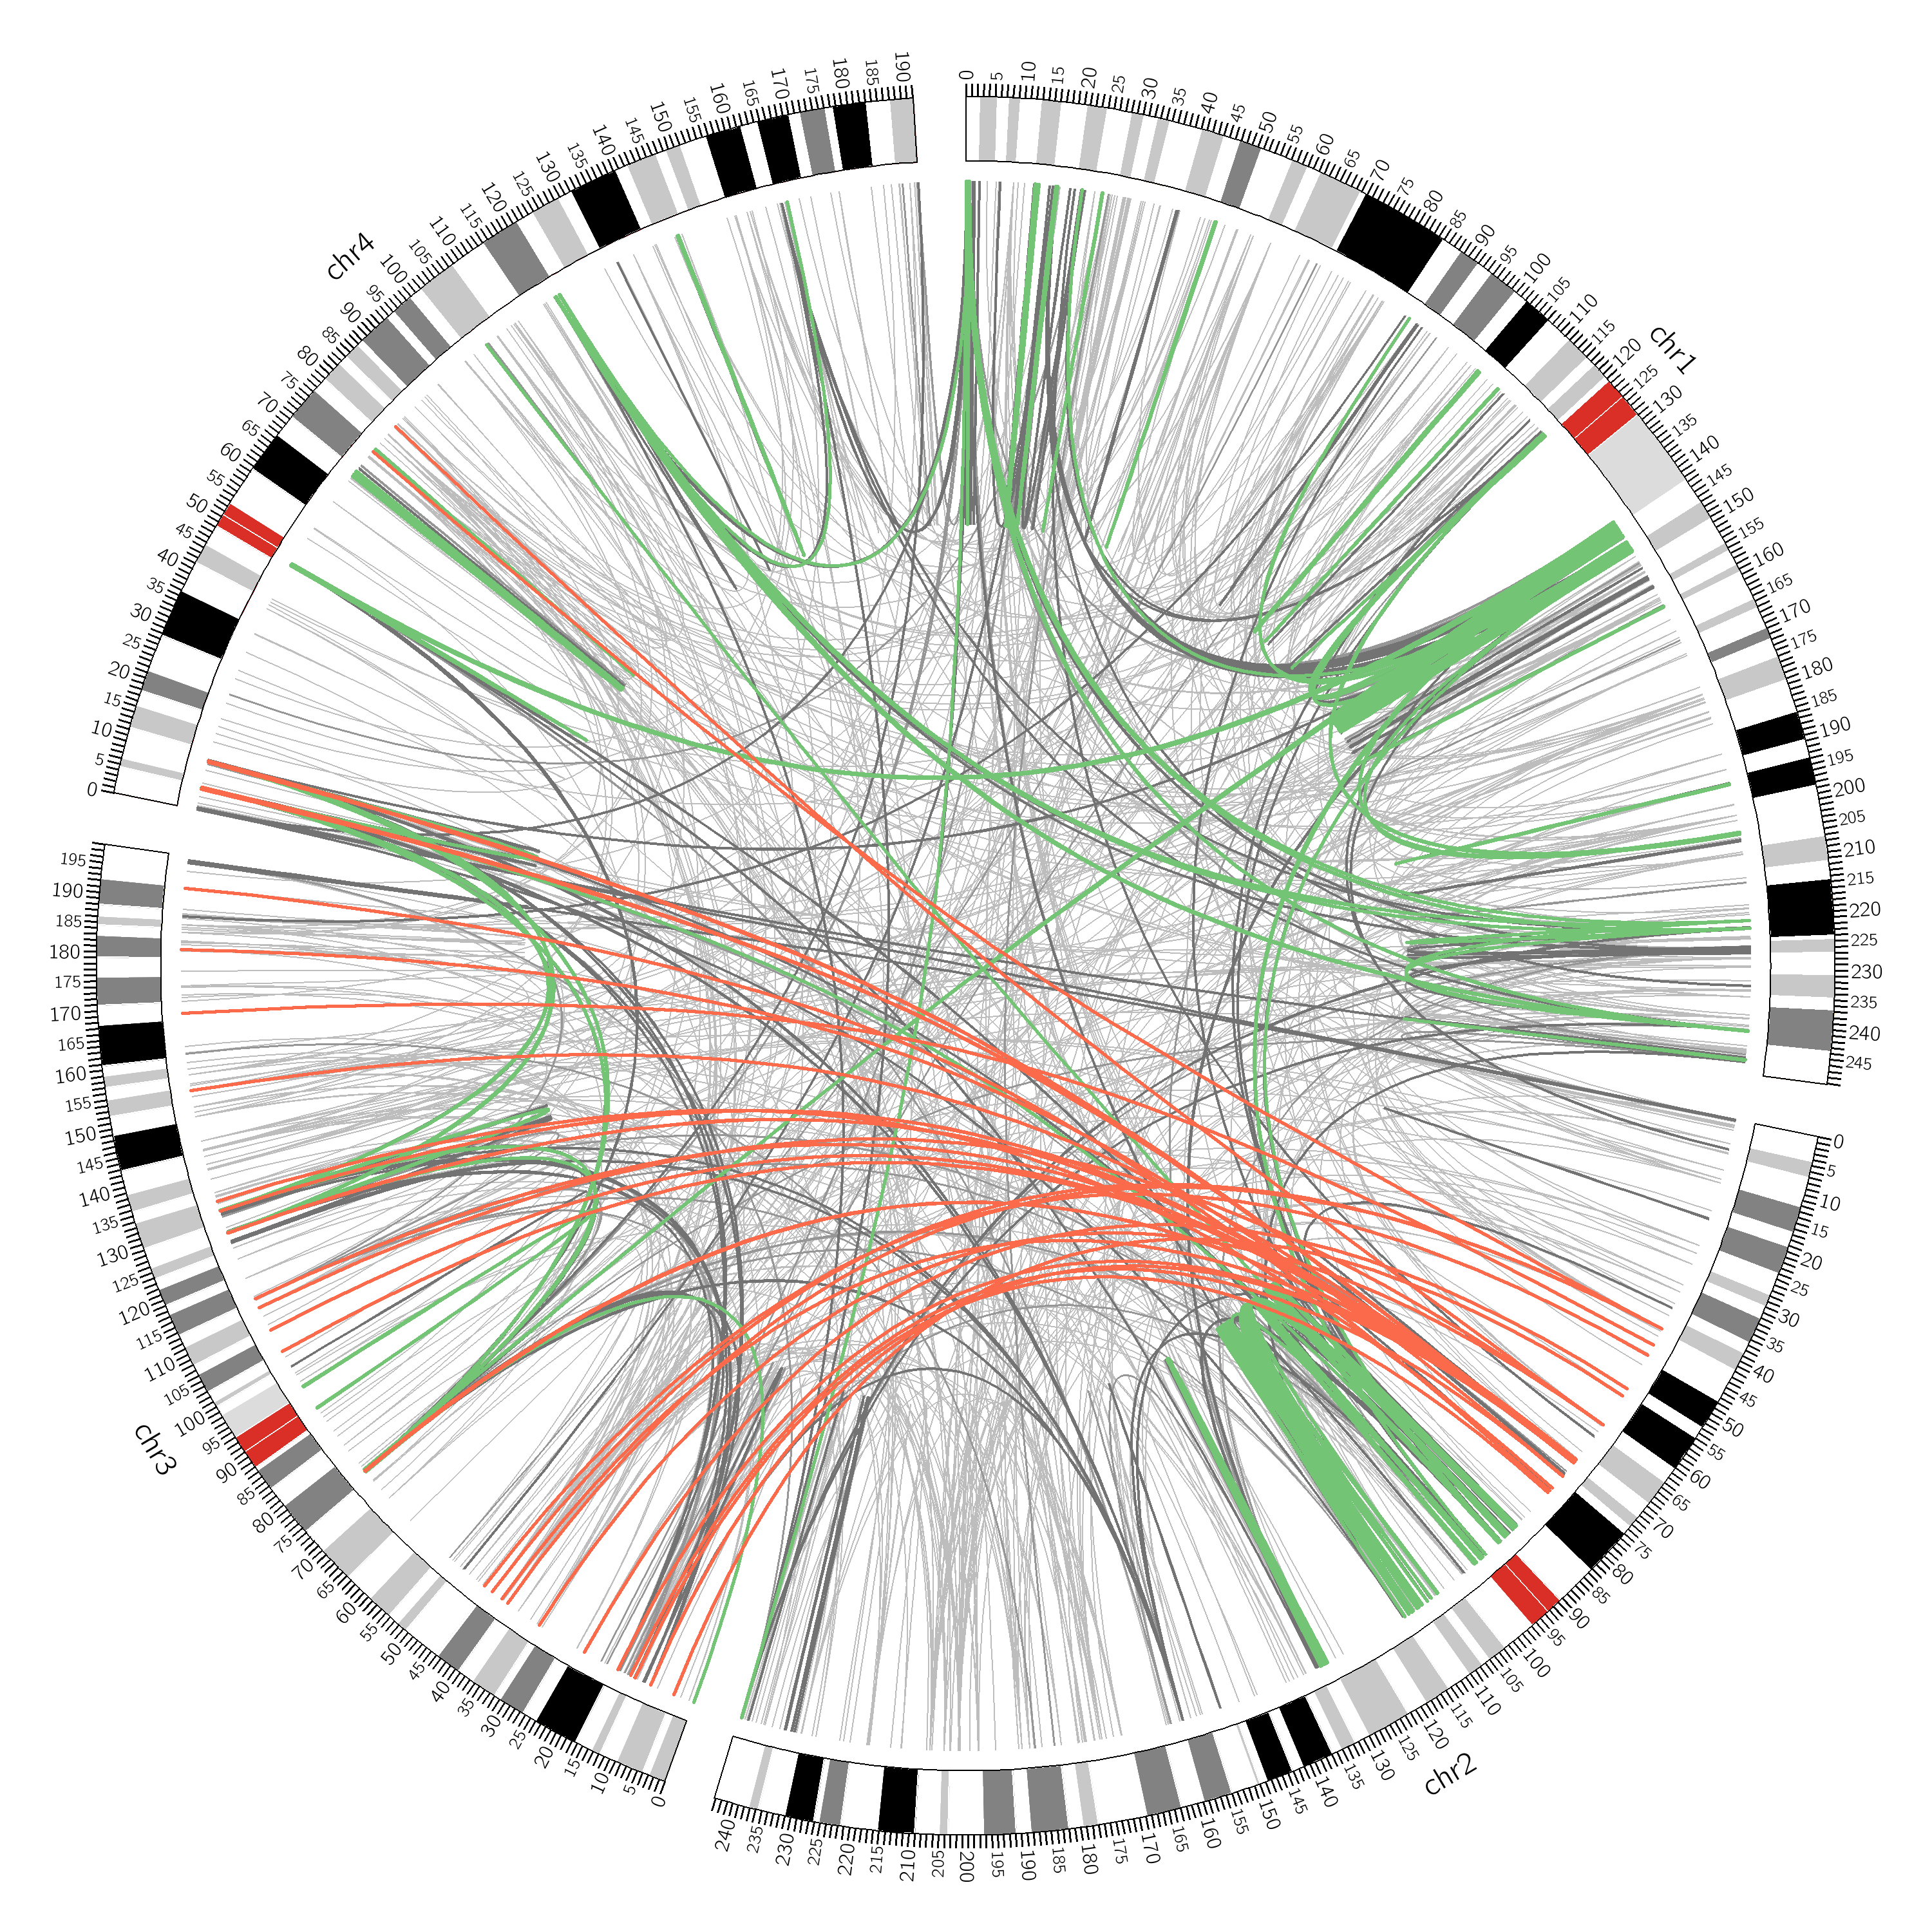

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Links and Relationships series by clicking [here &#10145;](Links_Part6.ipynb).

----